In [1]:
DATA_FILE = "data/fire_theft.xls"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import xlrd

In [3]:
df = pd.read_excel(DATA_FILE)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
X    42 non-null float64
Y    42 non-null int64
dtypes: float64(1), int64(1)
memory usage: 752.0 bytes


In [5]:
book = xlrd.open_workbook(DATA_FILE,encoding_override="utf-8")

In [6]:
sheet = book.sheet_by_index(0)

In [7]:
df.head(10)

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53
5,34.1,68
6,11.0,75
7,6.9,18
8,7.3,31
9,15.1,25


In [8]:
data_x = df.loc[:,'X'].to_numpy()

In [9]:
data_y = df.loc[:,'Y'].to_numpy()

In [10]:
data = np.dstack((data_x,data_y))[0]

In [11]:
data

array([[  6.2,  29. ],
       [  9.5,  44. ],
       [ 10.5,  36. ],
       [  7.7,  37. ],
       [  8.6,  53. ],
       [ 34.1,  68. ],
       [ 11. ,  75. ],
       [  6.9,  18. ],
       [  7.3,  31. ],
       [ 15.1,  25. ],
       [ 29.1,  34. ],
       [  2.2,  14. ],
       [  5.7,  11. ],
       [  2. ,  11. ],
       [  2.5,  22. ],
       [  4. ,  16. ],
       [  5.4,  27. ],
       [  2.2,   9. ],
       [  7.2,  29. ],
       [ 15.1,  30. ],
       [ 16.5,  40. ],
       [ 18.4,  32. ],
       [ 36.2,  41. ],
       [ 39.7, 147. ],
       [ 18.5,  22. ],
       [ 23.3,  29. ],
       [ 12.2,  46. ],
       [  5.6,  23. ],
       [ 21.8,   4. ],
       [ 21.6,  31. ],
       [  9. ,  39. ],
       [  3.6,  15. ],
       [  5. ,  32. ],
       [ 28.6,  27. ],
       [ 17.4,  32. ],
       [ 11.3,  34. ],
       [  3.4,  17. ],
       [ 11.9,  46. ],
       [ 10.5,  42. ],
       [ 10.7,  43. ],
       [ 10.8,  34. ],
       [  4.8,  19. ]])

In [12]:
#######################
## Defining flags #####
#######################
tf.app.flags.DEFINE_integer(
    'num_epochs', 5, 'The number of epochs for training the model. Default=50')
# Store all elements in FLAG structure!
tf.app.flags.DEFINE_string('f', '', 'kernel')
FLAGS = tf.app.flags.FLAGS

In [13]:
W = tf.Variable(np.random.randn,name="weights")
b = tf.Variable(0.0,name="bias")

In [14]:
def inputs():
    X = tf.placeholder(tf.float32,name="X")
    Y = tf.placeholder(tf.float32,name="Y")
    return X,Y

In [15]:
def inference(X):
    """
    Forward passing the X.
    :param X: Input.
    :return: X*W + b.
    """
    return X * W + b

In [16]:
def loss(X, Y):
    """
    compute the loss by comparing the predicted value to the actual label.
    :param X: The input.
    :param Y: The label.
    :return: The loss over the samples.
    """
    # Making the prediction.
    Y_predicted = inference(X)
    return tf.squared_difference(Y, Y_predicted)

In [19]:
def train(loss):
    learning_rate = 0.001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

x = 8.6 y = 53.0 loss = 616.2871
x = 15.1 y = 25.0 loss = 140.28291
x = 2.5 y = 22.0 loss = 90.72469
x = 15.1 y = 30.0 loss = 434.19495
x = 18.5 y = 22.0 loss = 21649.322
x = 21.6 y = 31.0 loss = 1467.3754
x = 17.4 y = 32.0 loss = 1125.7109
x = 10.7 y = 43.0 loss = 297.02216


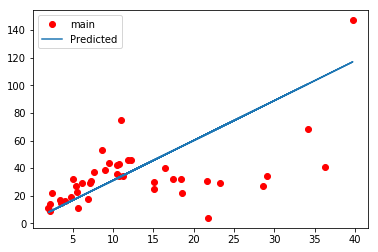

epoch 1, loss=16.015934
x = 8.6 y = 53.0 loss = 103.395775
x = 15.1 y = 25.0 loss = 430.73285
x = 2.5 y = 22.0 loss = 68.78624
x = 15.1 y = 30.0 loss = 326.9862
x = 18.5 y = 22.0 loss = 21878.027
x = 21.6 y = 31.0 loss = 1454.1317
x = 17.4 y = 32.0 loss = 1096.9211
x = 10.7 y = 43.0 loss = 292.3676


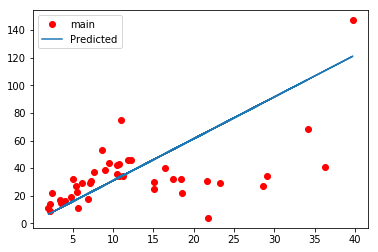

epoch 2, loss=13.961980
x = 8.6 y = 53.0 loss = 101.04359
x = 15.1 y = 25.0 loss = 411.49924
x = 2.5 y = 22.0 loss = 62.52639
x = 15.1 y = 30.0 loss = 319.87195
x = 18.5 y = 22.0 loss = 21642.191
x = 21.6 y = 31.0 loss = 1443.8212
x = 17.4 y = 32.0 loss = 1069.2609
x = 10.7 y = 43.0 loss = 287.8722


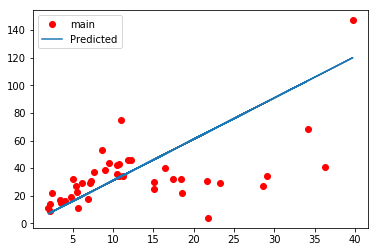

epoch 3, loss=12.097948
x = 8.6 y = 53.0 loss = 98.78003
x = 15.1 y = 25.0 loss = 393.19843
x = 2.5 y = 22.0 loss = 56.719677
x = 15.1 y = 30.0 loss = 313.02188
x = 18.5 y = 22.0 loss = 21413.857
x = 21.6 y = 31.0 loss = 1433.8193
x = 17.4 y = 32.0 loss = 1042.6752
x = 10.7 y = 43.0 loss = 283.52966


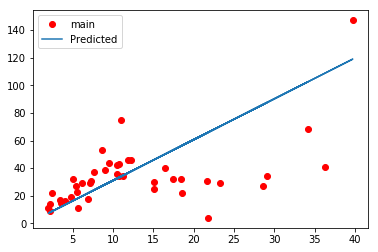

epoch 4, loss=10.411666
x = 8.6 y = 53.0 loss = 96.60115
x = 15.1 y = 25.0 loss = 375.78363
x = 2.5 y = 22.0 loss = 51.339016
x = 15.1 y = 30.0 loss = 306.42514
x = 18.5 y = 22.0 loss = 21192.746
x = 21.6 y = 31.0 loss = 1424.1168
x = 17.4 y = 32.0 loss = 1017.1173
x = 10.7 y = 43.0 loss = 279.33423


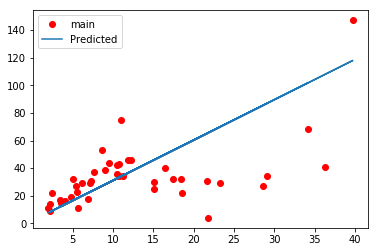

epoch 5, loss=8.891701
x = 8.6 y = 53.0 loss = 94.503525
x = 15.1 y = 25.0 loss = 359.2107
x = 2.5 y = 22.0 loss = 46.358833
x = 15.1 y = 30.0 loss = 300.0712
x = 18.5 y = 22.0 loss = 20978.621
x = 21.6 y = 31.0 loss = 1414.7039
x = 17.4 y = 32.0 loss = 992.5432
x = 10.7 y = 43.0 loss = 275.2803


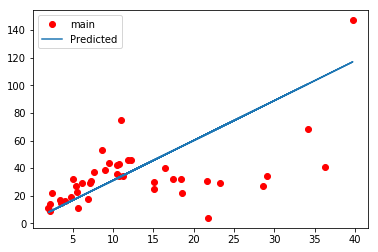

epoch 6, loss=7.527262
x = 8.6 y = 53.0 loss = 92.4838
x = 15.1 y = 25.0 loss = 343.43707
x = 2.5 y = 22.0 loss = 41.75498
x = 15.1 y = 30.0 loss = 293.94998
x = 18.5 y = 22.0 loss = 20771.225
x = 21.6 y = 31.0 loss = 1405.5712
x = 17.4 y = 32.0 loss = 968.9112
x = 10.7 y = 43.0 loss = 271.3626


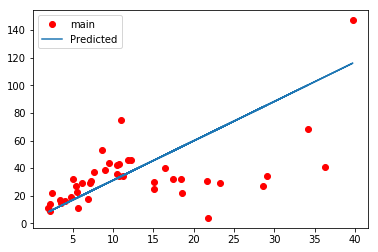

epoch 7, loss=6.308176
x = 8.6 y = 53.0 loss = 90.5387
x = 15.1 y = 25.0 loss = 328.42285
x = 2.5 y = 22.0 loss = 37.504658
x = 15.1 y = 30.0 loss = 288.0519
x = 18.5 y = 22.0 loss = 20570.338
x = 21.6 y = 31.0 loss = 1396.7096
x = 17.4 y = 32.0 loss = 946.1803
x = 10.7 y = 43.0 loss = 267.57593


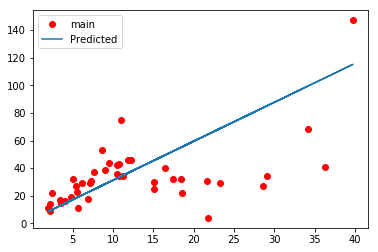

epoch 8, loss=5.224843
x = 8.6 y = 53.0 loss = 88.66512
x = 15.1 y = 25.0 loss = 314.1296
x = 2.5 y = 22.0 loss = 33.58635
x = 15.1 y = 30.0 loss = 282.36804
x = 18.5 y = 22.0 loss = 20375.715
x = 21.6 y = 31.0 loss = 1388.1099
x = 17.4 y = 32.0 loss = 924.31177
x = 10.7 y = 43.0 loss = 263.9155


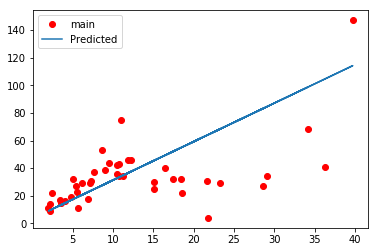

epoch 9, loss=4.268269
x = 8.6 y = 53.0 loss = 86.860085
x = 15.1 y = 25.0 loss = 300.5217
x = 2.5 y = 22.0 loss = 29.979753
x = 15.1 y = 30.0 loss = 276.88965
x = 18.5 y = 22.0 loss = 20187.148
x = 21.6 y = 31.0 loss = 1379.7649


In [ ]:
with tf.Session() as sess:
    # Initialize the variables[w and b].
    sess.run(tf.global_variables_initializer())
    # Get the input tensors
    X, Y = inputs()
    # Return the train loss and create the train_op.
    train_loss = loss(X, Y)
    train_op = train(train_loss)
    # Step 8: train the modeltrain_l
    for epoch_num in range(10): # run 100 epochs
        count = 0
        for x, y in data:
            count+=1
            if count % 5 == 0:
                print("x =",x,"y =",y,"loss =",loss_value)
            train_op = train(train_loss)
            # Session runs train_op to minimize loss
            loss_value,_ = sess.run([train_loss,train_op], feed_dict={X: x, Y: y})
            # Displaying the loss per epoch.
            
        ###############################
        #### Evaluate and plot ########
        ###############################
        Input_values = data[:,0]
        Labels = data[:,1]
        Prediction_values = data[:,0] * wcoeff + bias
        plt.plot(Input_values, Labels, 'ro', label='main')
        plt.plot(Input_values, Prediction_values, label='Predicted')

        # Saving the result.
        plt.legend()
        plt.show()
        print('epoch %d, loss=%f' %(epoch_num+1, loss_value))

        # save the values of weight and bias
        wcoeff, bias = sess.run([W, b])